In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

RUN JUST THE VISUALIZATION PART ONLY

In [ ]:
d=pd.read_excel("can_1.xlsx")

In [ ]:
df=pd.DataFrame(d)
df.head()

,S. No.,Candidate Name,Counselor Name,Block Amount Received Date,Univ. Pitched,Lead Id,Candidate Preferred College #1,Candidate Preferred College #2,GPA (Out of 4),PG - CGPA,...,Affidavit Letter,Sponsorship Letter,Offer Letter,Offer Letter Submission Date,Financials Submission,Financials Submission Date,i20 Provisioned,i20 Provisioned Date,Remarks,Status
0,1,Vikash,Shailendra Singh,14/08/2023,Rutgers,Unknown,Rutgers Business School,No preference,2.83,Unknown,...,1,0,0.0,Unknown,1.0,Unknown,Received,3/14/2024,No remarks,Defer Fall
1,2,Hariraj,Shailendra Singh,19/09/2023,Fairfield/DePaul,Unknown,DePaul Kellstadt Graduate School of Business,No preference,3.18,Unknown,...,1,0,0.0,Unknown,0.0,Unknown,Unknown,Unknown,On Hold due to CX In Hospital,Defer Fall
2,3,Thippesh,Shailendra Singh,21/09/2023,Rutgers,Unknown,Rutgers Business School,No preference,3.14,Unknown,...,1,0,0.0,Unknown,1.0,2/20/2024,Received,2/20/2024,No remarks,Defer Fall
3,4,Chintan,Shailendra Singh,03/10/2023,DePaul,Unknown,DePaul Kellstadt Graduate School of Business,No preference,4.0,Unknown,...,1,0,0.0,Unknown,1.0,Unknown,Received,3/28/2024,was On Hold due to family issues,Defer Fall (Dropped)
4,5,Sagar,Shailendra Singh,12/09/2023,Rutgers,Unknown,Rutgers Business School,No preference,2.96,Unknown,...,1,0,0.0,10/25/2023,1.0,2/18/2024,Received,2/21/2024,No remarks,Defer Fall


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Columns: 126 entries, S. No. to Status 
dtypes: float64(71), int64(1), object(54)
memory usage: 310.2+ KB


In [ ]:
def convert_to_int(value):
    if isinstance(value, str) and value.isdigit():
        return int(value)
    elif isinstance(value, str) and value.split()[0].isdigit():
        return int(value.split()[0])
    else:
        return value

df['Work Exp.'] = df['Work Exp.'].apply(convert_to_int)


In [ ]:
df['Work Exp.'].head(25)

0       3
1       1
2       2
3       1
4       3
5       4
6       7
7      10
8      12
9       8
10      4
11      9
12     11
13      4
14      3
15    NaN
16      3
17     15
18      8
19      3
20      6
21    NaN
22    4.5
23    NaN
24      6
Name: Work Exp., dtype: object

In [ ]:
df['Work Exp.'].isnull().sum()

0

In [ ]:
df['Work Exp.'].fillna(df['Work Exp.'].median(),inplace=True)

In [ ]:
df.loc[229, 'Work Exp.']=0

In [ ]:
df.loc[229, 'Work Exp.']

0

In [ ]:
def clean_and_convert(value):
    if isinstance(value, str):
        value = value.replace('+', '')
        value = value.replace(' years', '')
        value = value.replace(' year', '')
        value = value.replace(' Year', '')
        value = value.replace('year', '')
        value = value.replace('Year', '')
        if '-' in value:
            parts = value.split('-')
            return (int(parts[0]) + int(parts[1])) / 2
        else:
            try:
                return int(value)
            except ValueError:
                return float(value)
    return float(value)

df['Work Exp.'] = df['Work Exp.'].apply(clean_and_convert)

print(df)

     S. No. Candidate Name    Counselor Name  Block Amount Received Date  \
0         1         Vikash  Shailendra Singh                     45152.0   
1         2        Hariraj  Shailendra Singh                     45188.0   
2         3       Thippesh  Shailendra Singh                     45190.0   
3         4        Chintan  Shailendra Singh                     45202.0   
4         5          Sagar  Shailendra Singh                     45181.0   
..      ...            ...               ...                         ...   
310     311         Samkit   Muskan Aggarwal                     45396.0   
311     312         Alladi  Rishabh Tripathi                     45397.0   
312     313       Shrishti  Rishabh Tripathi                     45397.0   
313     314        purnima  Rishabh Tripathi                     45397.0   
314     315          Ashok   Diptikanta Jena                     45397.0   

        Univ. Pitched             Lead Id  \
0             Rutgers                 NaN 

In [ ]:
df['Work Exp.']

0      3
1      1
2      2
3      1
4      3
      ..
310    2
311    5
312    2
313    5
314    5
Name: Work Exp., Length: 315, dtype: Int64

In [ ]:
df['Work Exp.'] = df['Work Exp.'].astype('Int64')


In [ ]:
df['Work Exp.'] = df['Work Exp.'].round()

In [ ]:
df['Candidate Application Status'].isnull().sum()

0

In [ ]:
df.to_excel('Candidate application.xlsx', index=False)

In [ ]:
from google.colab import files
files.download('Candidate application.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
a=pd.read_excel("Candidate application.xlsx")
af=pd.DataFrame(a)
af.head()

,S. No.,Candidate Name,Counselor Name,Block Amount Received Date,Univ. Pitched,Lead Id,Candidate Preferred College #1,Candidate Preferred College #2,10th Percentage,12th Percentange,...,Affidavit Letter,Sponsorship Letter,Offer Letter,Offer Letter Submission Date,Financials Submission,Financials Submission Date,i20 Provisioned,i20 Provisioned Date,Remarks,Status
0,1,Vikash,Shailendra Singh,45152.0,Rutgers,NaN,Rutgers Business School,NaN,NaN,NaN,...,1.0,0.0,0.0,NaN,1.0,NaN,Received,45365.0,NaN,Defer Fall
1,2,Hariraj,Shailendra Singh,45188.0,Fairfield/DePaul,NaN,DePaul Kellstadt Graduate School of Business,NaN,NaN,NaN,...,1.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,On Hold due to CX In Hospital,Defer Fall
2,3,Thippesh,Shailendra Singh,45190.0,Rutgers,NaN,Rutgers Business School,NaN,NaN,NaN,...,1.0,0.0,0.0,NaN,1.0,45342.0,Received,45342.0,NaN,Defer Fall
3,4,Chintan,Shailendra Singh,45202.0,DePaul,NaN,DePaul Kellstadt Graduate School of Business,NaN,NaN,NaN,...,1.0,0.0,0.0,NaN,1.0,NaN,Received,45379.0,was On Hold due to family issues,Defer Fall (Dropped)
4,5,Sagar,Shailendra Singh,45181.0,Rutgers,NaN,Rutgers Business School,NaN,NaN,NaN,...,1.0,0.0,0.0,45224.0,1.0,45340.0,Received,45343.0,NaN,Defer Fall


In [ ]:
af['Candidate Application Status'] = af['Candidate Application Status'].apply(lambda x: 'in progress' if x != 'Candidate Dropped' else x)


In [ ]:
af["If dropped, mention stage of the application"].isnull().sum()

296

In [ ]:
af.to_excel('Candidate application.xlsx', index=False)

In [ ]:
from google.colab import files
files.download('Candidate application.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df["Degree"].unique()

array(['Unknown', 'B.E', 'B.Tech', 'BA LLB', 'B. Tech', 'B.Sc',
       'BTECH CIVIL', 'Bachelor of Ayurvedic Medicine and Surgery (BAMS)',
       'Bchalor Of Arts', 'B.Tech (ME )', 'B.E.',
       'B. Sc. Physical Education, Health Education and Sports', 'BSc',
       'Bachelor of Engineering', 'B.com(Computers)', 'MBA', 'M.Tech',
       'PGDM', 'CHARTERED ACCOUNTANCY', 'B.E.IT', 'B.COM', 'BBA', 'M.Sc',
       'B.Sc., Hindu College', 'MCA', 'BE', 'LLM',
       'B.E Electronics Engineering',
       'B.Tech (Electronic and Instrumentation Engineering)',
       'B.SC Hons.', 'PGDC', 'Bachelors of Commerce',
       'B.E (Computer Engineering)', 'Masters/PGP in Machine learning',
       'Masters of Biomedical Engineering', 'M.com',
       'BTech Manufacturing Engineering& Technology',
       'B.E Computer Science'], dtype=object)

In [ ]:
df["Specialization"].unique()

array(['Unknown', 'Information Science And Engineering',
       ' ELECTRONICS & COMMUNICATION ENGINEERING',
       ' Industrial Production', ' Electrical Engineering',
       ' Civil Engineering', ' Information Science & Engg.', ' LAW',
       ' Electronics and Communication Engineering', ' Mechatronics',
       ' Electrical and Electronics Engineering',
       ' Maths, Physics, Computer Science', ' Production Engineering',
       ' Computer science and Engineering', ' Mathematics',
       ' Ayurvedic Medicine', ' Econimics', ' Mechanical Engineering',
       ' Biotechnology', ' Information Technology',
       ' Computer Science Engineering', ' Chemistry, Botany, Zoology',
       ' Instrumentation and Control Engineering',
       ' Human Resource Management', ' Finance',
       ' COMPUTER SCIENCE & ENGINEERING', ' Commerce', ' FINANCE GENERAL',
       ' Electronics and Telecommunication Engineering',
       ' Computer Science', ' General Management', ' Textile Technology',
       ' Ele

In [ ]:
import pandas as pd
import re



def split_degree(degree):
    degree = degree.lower().strip()

    degree_types = [
        'b.e', 'b.tech', 'b.sc', 'b.com', 'bba', 'mba', 'm.tech', 'm.sc', 'm.com', 'mca', 'llm', 'pgdm', 'pgdc', 'chartered accountancy'
    ]

    special_cases = {
        'bsc physical education': 'b.sc',
        'masters/pgp in machine learning': 'masters',
        'masters of biomedical engineering': 'masters',
        'bachelor of ayurvedic medicine and surgery (bams)': 'bams'
    }

    for key, value in special_cases.items():
        if degree.startswith(key):
            specialization = re.sub(f'^{re.escape(key)}', '', degree).strip()
            return value.upper(), specialization

    for dtype in degree_types:
        if degree.startswith(dtype):
            specialization = re.sub(f'^{re.escape(dtype)}', '', degree).strip()
            return dtype.upper(), specialization

    return degree.upper(), None

df[['Degree', 'Specialization']] = df.apply(
    lambda row: pd.Series(split_degree(row['Degree'])) if pd.isna(row['Specialization']) else pd.Series([row['Degree'], row['Specialization']]),
    axis=1
)




In [ ]:
df["Degree"].unique()

array(['Unknown', 'B.E', 'B.Tech', 'BA LLB', 'B. Tech', 'B.Sc',
       'BTECH CIVIL', 'Bachelor of Ayurvedic Medicine and Surgery (BAMS)',
       'Bchalor Of Arts', 'B.Tech (ME )', 'B.E.',
       'B. Sc. Physical Education, Health Education and Sports', 'BSc',
       'Bachelor of Engineering', 'B.com(Computers)', 'MBA', 'M.Tech',
       'PGDM', 'CHARTERED ACCOUNTANCY', 'B.E.IT', 'B.COM', 'BBA', 'M.Sc',
       'B.Sc., Hindu College', 'MCA', 'BE', 'LLM',
       'B.E Electronics Engineering',
       'B.Tech (Electronic and Instrumentation Engineering)',
       'B.SC Hons.', 'PGDC', 'Bachelors of Commerce',
       'B.E (Computer Engineering)', 'Masters/PGP in Machine learning',
       'Masters of Biomedical Engineering', 'M.com',
       'BTech Manufacturing Engineering& Technology',
       'B.E Computer Science'], dtype=object)

In [ ]:
import pandas as pd
import re


def split_degree(Degree):
    degree = degree.lower().strip()

    degree_types = [
        'b.e', 'b.tech', 'b.sc', 'b.com', 'bba', 'mba', 'm.tech', 'm.sc', 'm.com', 'mca', 'llm', 'pgdm', 'pgdc', 'chartered accountancy'
    ]

    special_cases = {
        'bsc physical education': 'b.sc',
        'masters/pgp in machine learning': 'masters',
        'masters of biomedical engineering': 'masters',
        'bachelor of ayurvedic medicine and surgery (bams)': 'bams'
    }

    for key, value in special_cases.items():
        if degree.startswith(key):
            specialization = re.sub(f'^{re.escape(key)}', '', degree).strip()
            return value.upper(), specialization

    for dtype in degree_types:
        if degree.startswith(dtype):
            specialization = re.sub(f'^{re.escape(dtype)}', '', degree).strip()
            return dtype.upper(), specialization

    return degree.upper(), None

df[['Degree', 'Specialization']] = df.apply(
    lambda row: pd.Series(split_degree(row['Degree'])) if pd.isna(row['Specialization']) else pd.Series([row['Degree'], row['Specialization']]),
    axis=1
)

print(df)


     S. No. Candidate Name    Counselor Name Block Amount Received Date  \
0         1         Vikash  Shailendra Singh                  8/14/2023   
1         2        Hariraj  Shailendra Singh                  9/19/2023   
2         3       Thippesh  Shailendra Singh                  9/21/2023   
3         4        Chintan  Shailendra Singh                  10/3/2023   
4         5          Sagar  Shailendra Singh                  9/12/2023   
..      ...            ...               ...                        ...   
310     311         Samkit   Muskan Aggarwal                  4/14/2024   
311     312         Alladi  Rishabh Tripathi                  4/15/2024   
312     313       Shrishti  Rishabh Tripathi                  4/15/2024   
313     314        purnima  Rishabh Tripathi                  4/15/2024   
314     315          Ashok   Diptikanta Jena                  4/15/2024   

        Univ. Pitched             Lead Id  \
0             Rutgers             Unknown   
1    Fair

In [ ]:
df["Specialization"].unique()

array(['Unknown', 'Information Science And Engineering',
       ' ELECTRONICS & COMMUNICATION ENGINEERING',
       ' Industrial Production', ' Electrical Engineering',
       ' Civil Engineering', ' Information Science & Engg.', ' LAW',
       ' Electronics and Communication Engineering', ' Mechatronics',
       ' Electrical and Electronics Engineering',
       ' Maths, Physics, Computer Science', ' Production Engineering',
       ' Computer science and Engineering', ' Mathematics',
       ' Ayurvedic Medicine', ' Econimics', ' Mechanical Engineering',
       ' Biotechnology', ' Information Technology',
       ' Computer Science Engineering', ' Chemistry, Botany, Zoology',
       ' Instrumentation and Control Engineering',
       ' Human Resource Management', ' Finance',
       ' COMPUTER SCIENCE & ENGINEERING', ' Commerce', ' FINANCE GENERAL',
       ' Electronics and Telecommunication Engineering',
       ' Computer Science', ' General Management', ' Textile Technology',
       ' Ele

In [ ]:
import pandas as pd
import re


def split_degree(degree):
    degree = degree.lower().strip()

    degree_types = [
        'b.e', 'b.tech', 'b.sc', 'b.com', 'bba', 'mba', 'm.tech', 'm.sc', 'm.com', 'mca', 'llm', 'pgdm', 'pgdc', 'chartered accountancy'
    ]

    special_cases = {
        'bsc physical education': 'b.sc',
        'masters/pgp in machine learning': 'masters',
        'masters of biomedical engineering': 'masters',
        'bachelor of ayurvedic medicine and surgery (bams)': 'bams'
    }

    for key, value in special_cases.items():
        if degree.startswith(key):
            specialization = re.sub(f'^{re.escape(key)}', '', degree).strip()
            return value.upper(), specialization

    for dtype in degree_types:
        if degree.startswith(dtype):
            specialization = re.sub(f'^{re.escape(dtype)}', '', degree).strip()
            return dtype.upper(), specialization

    return degree.upper(), None

df[['Degree', 'Specialization']] = df.apply(
    lambda row: pd.Series(split_degree(row['Degree'])) if pd.isna(row['Specialization']) else pd.Series([row['Degree'], row['Specialization']]),
    axis=1
)

print("Updated DataFrame:")
print(df)

print("Unique values in 'Degree' column after transformation:")
print(df['Degree'].unique())


Updated DataFrame:
     S. No. Candidate Name    Counselor Name Block Amount Received Date  \
0         1         Vikash  Shailendra Singh                  8/14/2023   
1         2        Hariraj  Shailendra Singh                  9/19/2023   
2         3       Thippesh  Shailendra Singh                  9/21/2023   
3         4        Chintan  Shailendra Singh                  10/3/2023   
4         5          Sagar  Shailendra Singh                  9/12/2023   
..      ...            ...               ...                        ...   
310     311         Samkit   Muskan Aggarwal                  4/14/2024   
311     312         Alladi  Rishabh Tripathi                  4/15/2024   
312     313       Shrishti  Rishabh Tripathi                  4/15/2024   
313     314        purnima  Rishabh Tripathi                  4/15/2024   
314     315          Ashok   Diptikanta Jena                  4/15/2024   

        Univ. Pitched             Lead Id  \
0             Rutgers             U

In [ ]:
columns = df.columns.tolist()
print(columns)


['S. No.', 'Candidate Name', 'Counselor Name', 'Block Amount Received Date', 'Univ. Pitched', 'Lead Id', 'Candidate Preferred College #1', 'Candidate Preferred College #2', 'GPA (Out of 4)', 'PG - CGPA', 'Work Exp.', 'Degree', 'Specialization', 'Candidate Application Status', 'Candidate Loan Status', 'Remarks - General', 'Reason for dropping', 'KYC & Acad Documents Received', 'Coding test score', 'English Exam Scores', 'Exam Taking Date', 'English Interview Score (15)', 'Tech Exam Scores_float', 'Tech interview scores', 'Application Type', 'Intake Status', 'Choice of School #1', 'Choice of Program #1', 'Passport #1', 'Resume #1', 'Degree #1', 'Transcript #1', 'Application Fee #1', 'LOR #1', 'SOP #1', 'Pending Stage #1', 'Application Status #1', 'Application Initation Date #1', 'App Partially Submitted Date #1', 'Application Submission Date #1', 'Offer Letter #1', 'Offer Letter Provision Date #1', 'Deposit #1', 'Deposit Date Paid #1', 'Choice of School #2', 'Choice of Program #2', 'Appl

In [ ]:
df.head(1)

,S. No.,Candidate Name,Counselor Name,Block Amount Received Date,Univ. Pitched,Lead Id,Candidate Preferred College #1,Candidate Preferred College #2,GPA (Out of 4),PG - CGPA,...,Affidavit Letter,Sponsorship Letter,Offer Letter,Offer Letter Submission Date,Financials Submission,Financials Submission Date,i20 Provisioned,i20 Provisioned Date,Remarks,Status
0,1,Vikash,Shailendra Singh,14/08/2023,Rutgers,Unknown,Rutgers Business School,No preference,2.83,Unknown,...,1,0,0.0,Unknown,1.0,Unknown,Received,3/14/2024,No remarks,Defer Fall


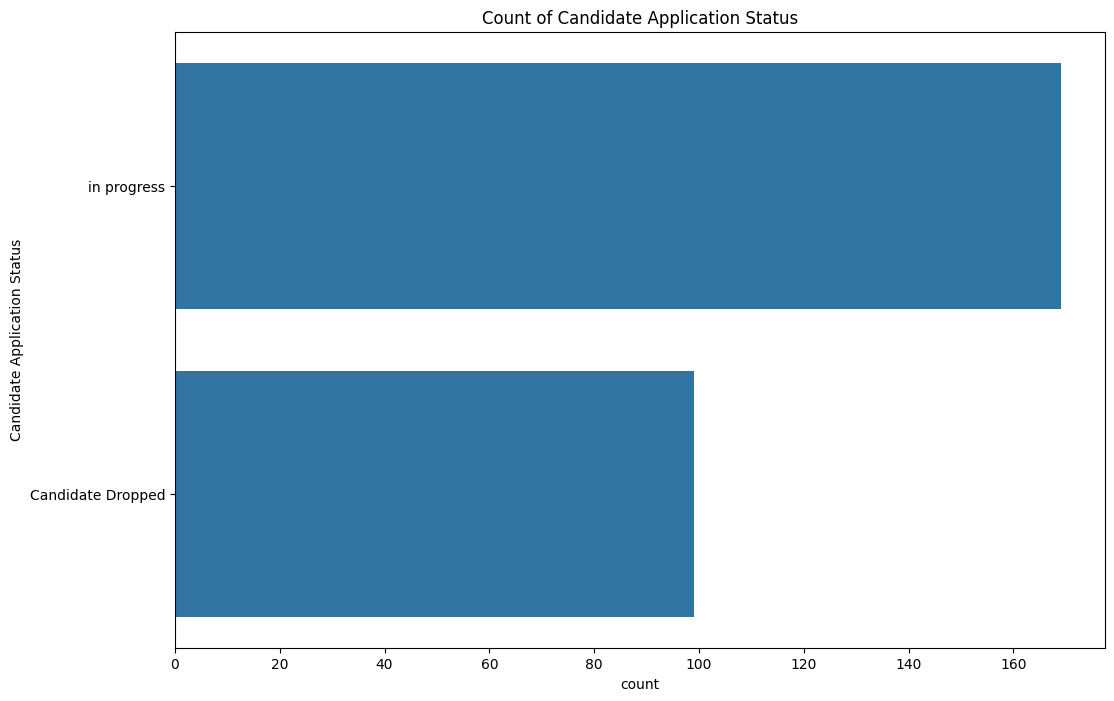

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Candidate Application Status', data=df)
plt.title('Count of Candidate Application Status')
plt.show()


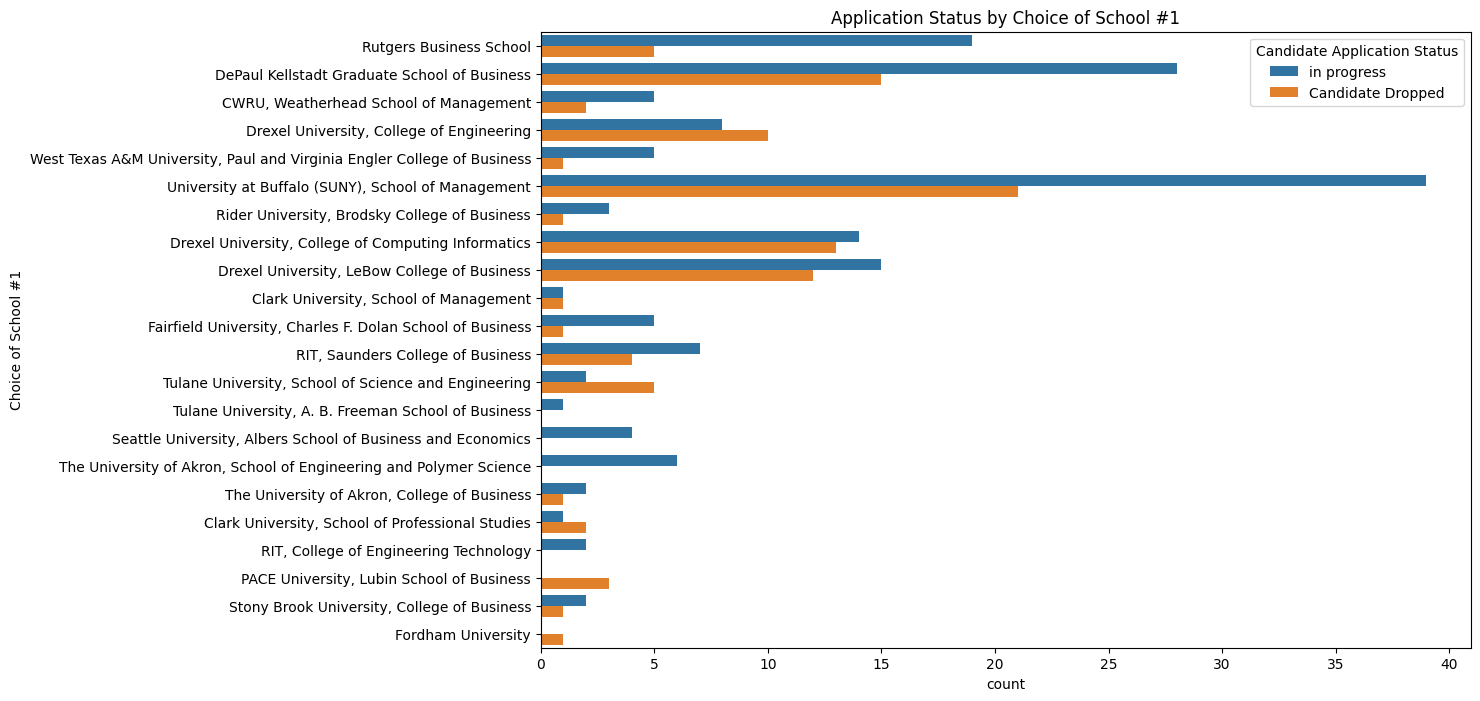

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Choice of School #1', hue='Candidate Application Status', data=df)
plt.title('Application Status by Choice of School #1')
plt.show()


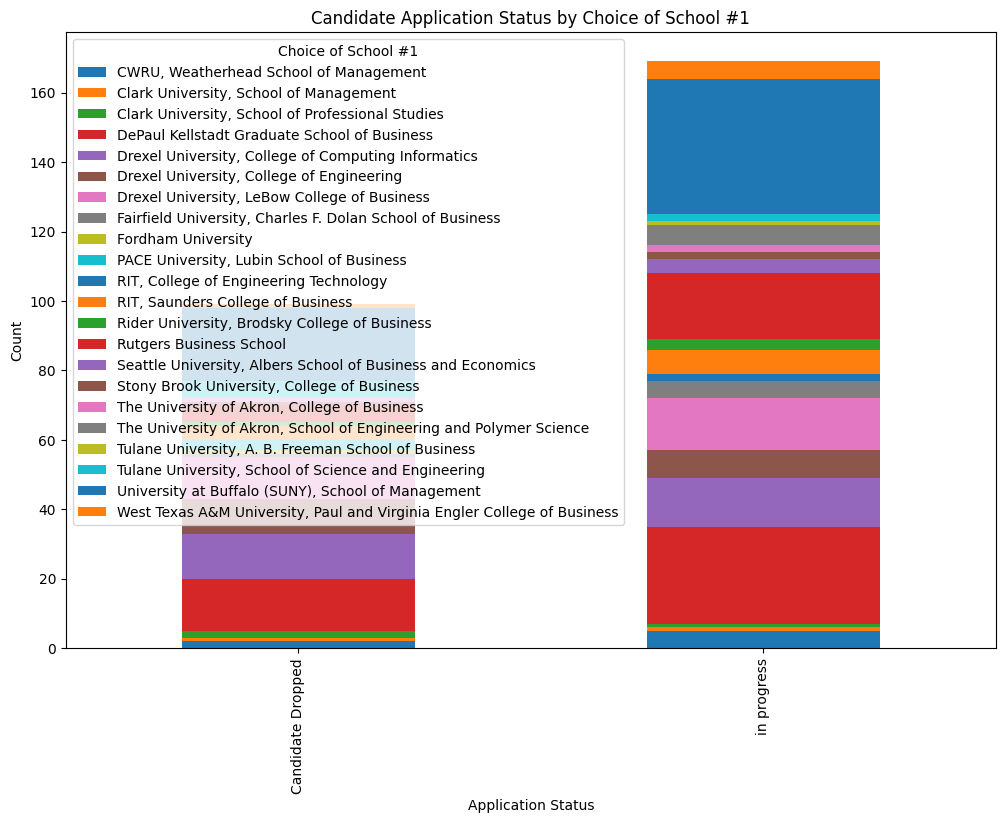

In [ ]:
status_school = pd.crosstab(df['Candidate Application Status'], df['Choice of School #1'])
status_school.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Candidate Application Status by Choice of School #1')
plt.xlabel('Application Status')
plt.ylabel('Count')
plt.show()


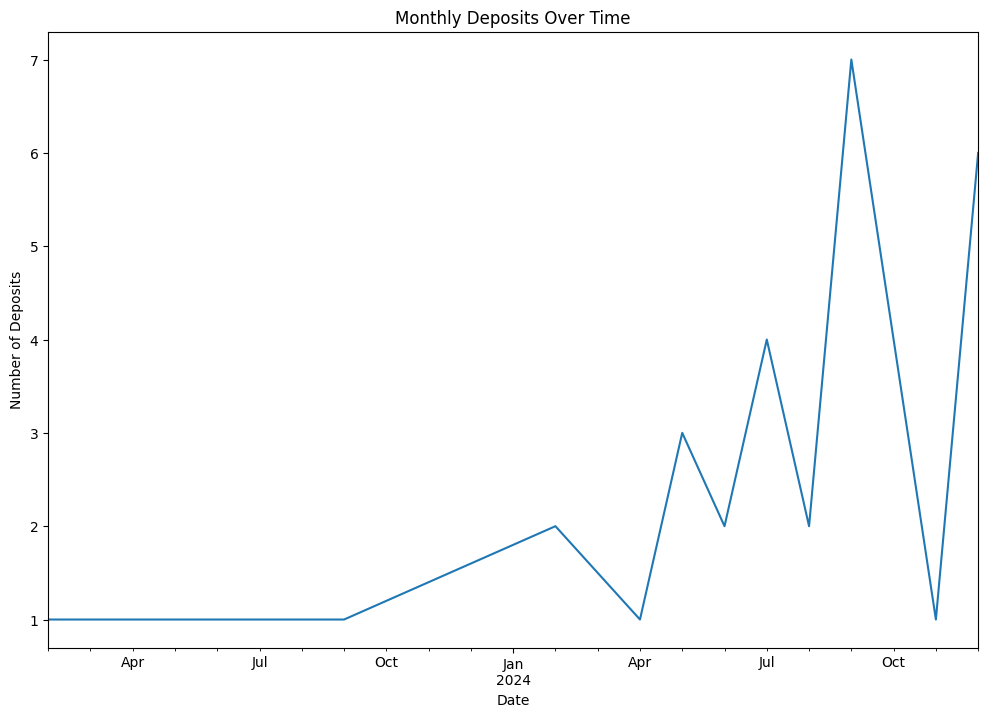

In [ ]:
df['Deposit Date Paid #1'] = pd.to_datetime(df['Deposit Date Paid #1'], errors='coerce')
deposit_time_series = df.groupby(df['Deposit Date Paid #1'].dt.to_period('M')).size()

plt.figure(figsize=(12, 8))
deposit_time_series.plot()
plt.title('Monthly Deposits Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Deposits')
plt.show()


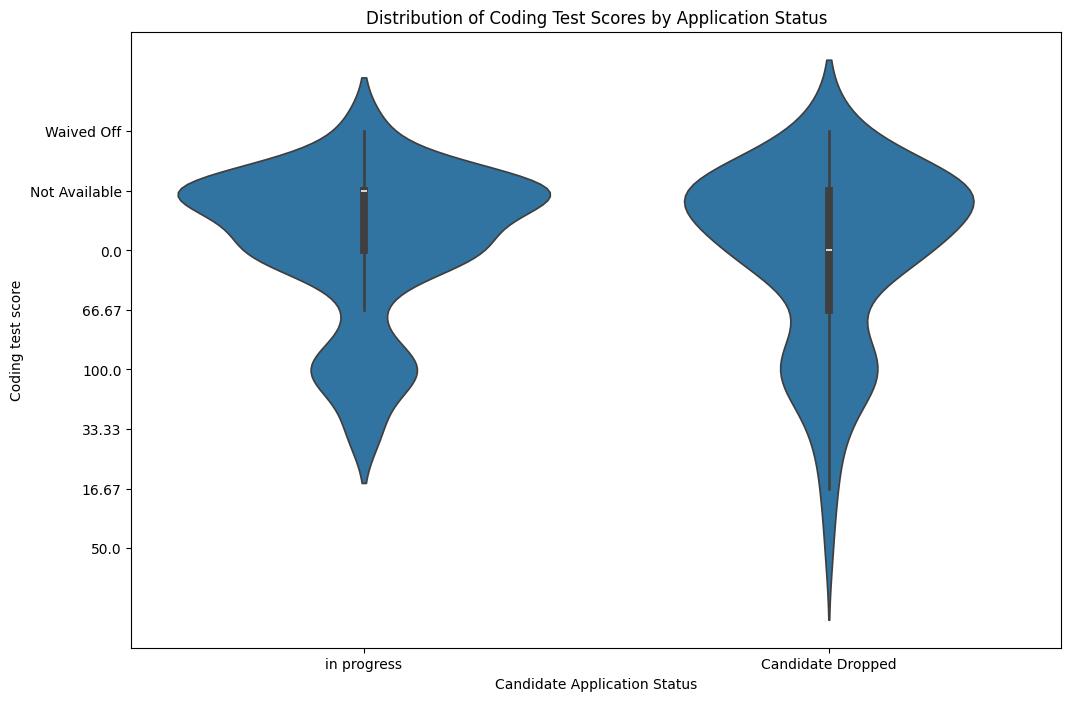

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Candidate Application Status', y='Coding test score', data=df)
plt.title('Distribution of Coding Test Scores by Application Status')
plt.show()


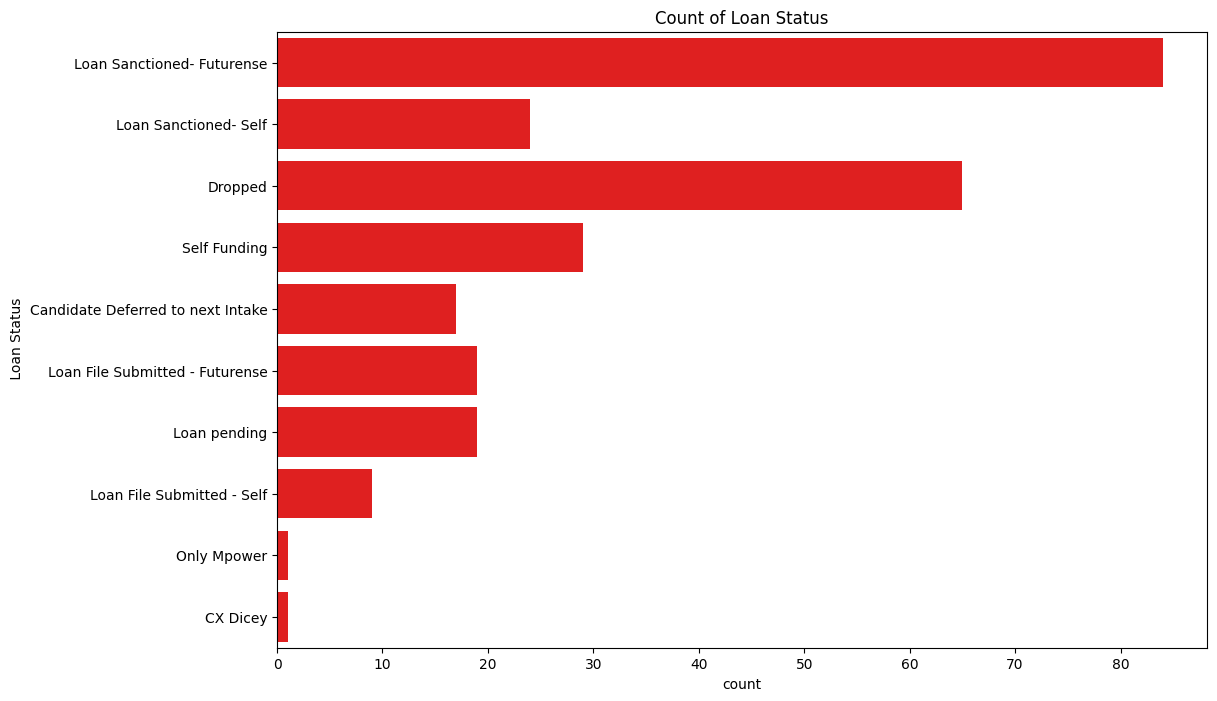

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(y=' Loan Status', data=df,color="red")
plt.title('Count of Loan Status')
plt.show()

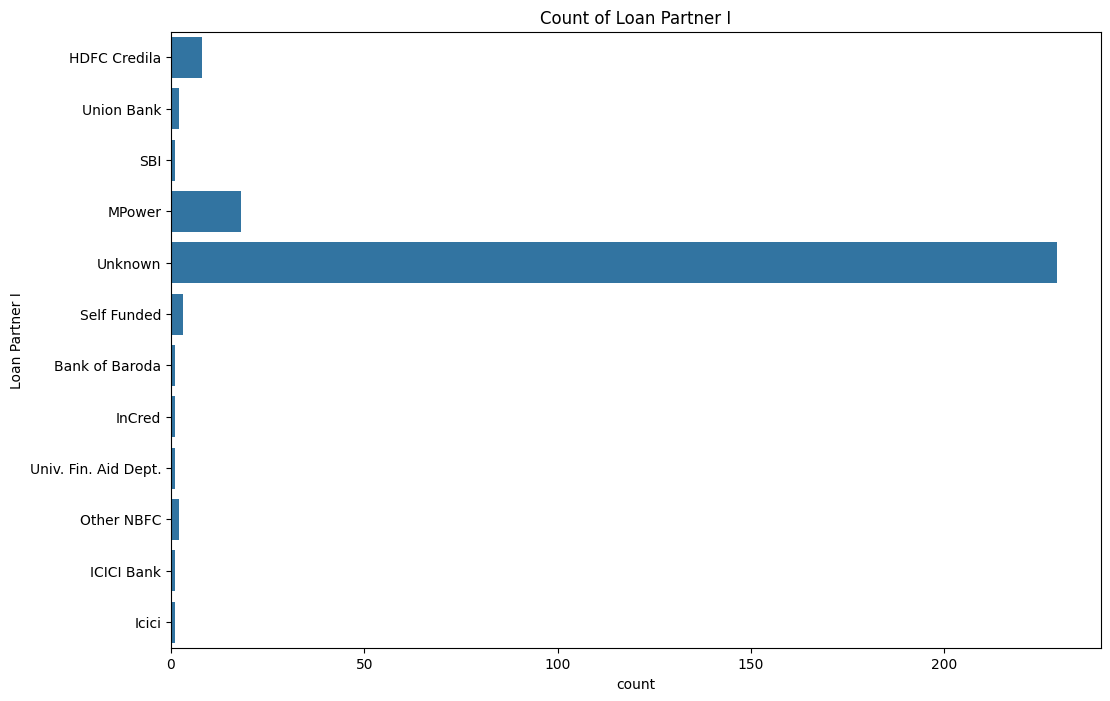

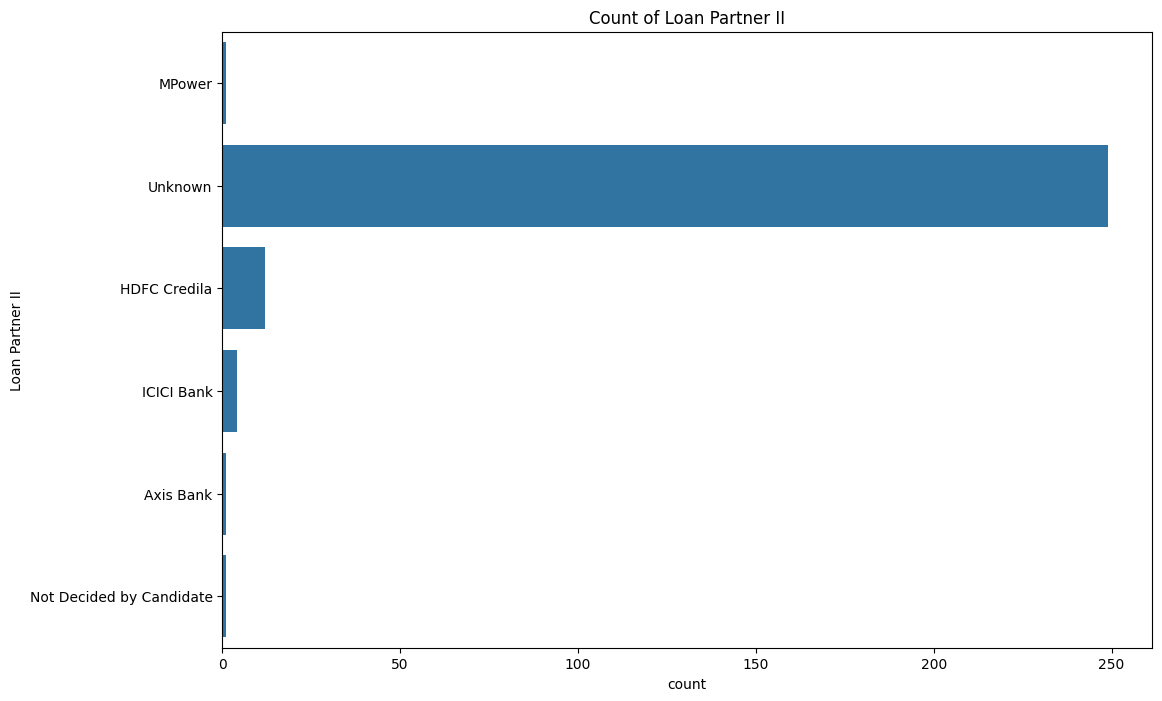

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Loan Partner I', data=df)
plt.title('Count of Loan Partner I')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(y='Loan Partner II', data=df)
plt.title('Count of Loan Partner II')
plt.show()



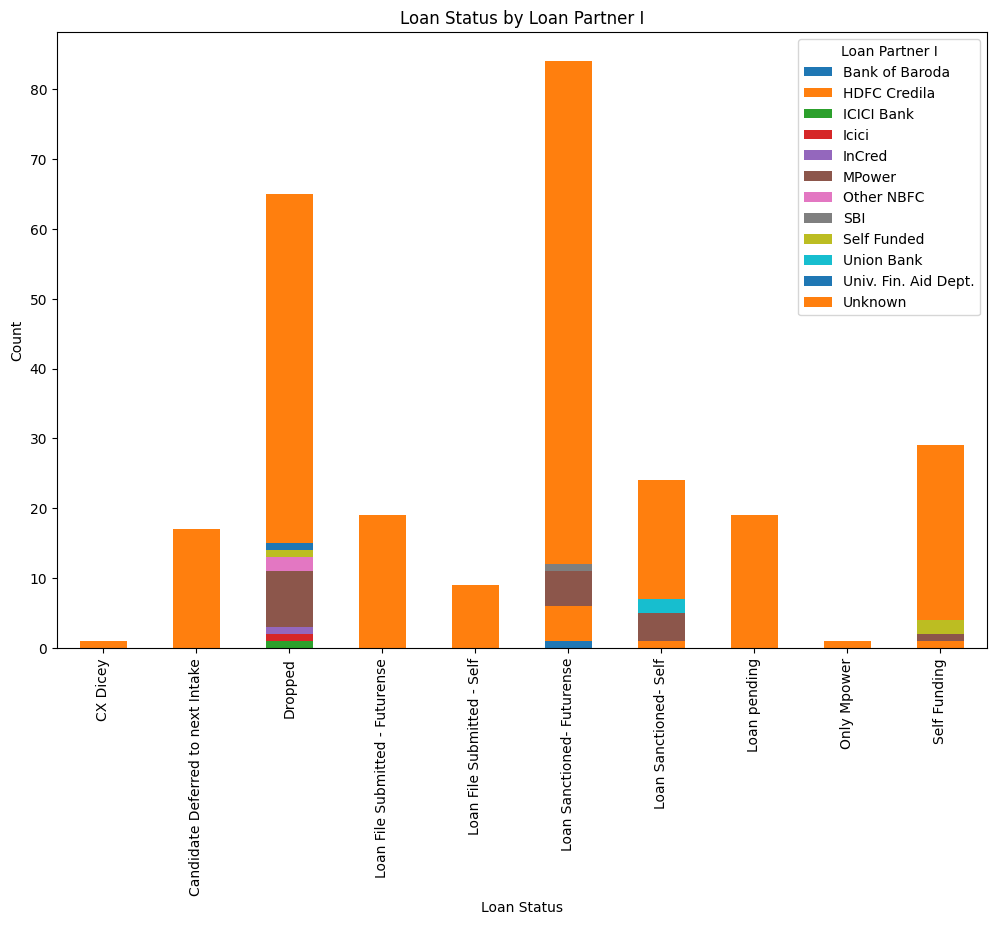

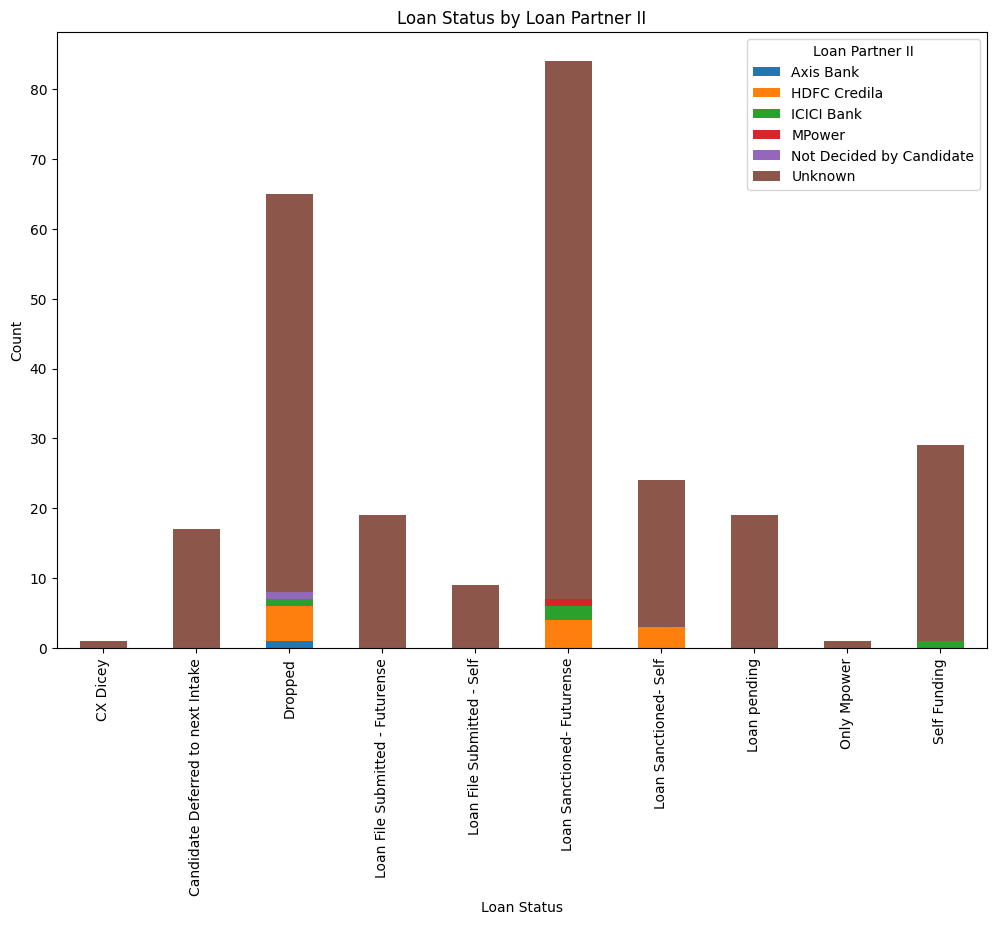

In [ ]:

if ' Loan Status' in df.columns:
    loan_partner_status = pd.crosstab(df[' Loan Status'], df['Loan Partner I'])


    loan_partner_status.plot(kind='bar', stacked=True, figsize=(12, 8))
    plt.title('Loan Status by Loan Partner I')
    plt.xlabel('Loan Status')
    plt.ylabel('Count')
    plt.show()


    loan_partner_status_ii = pd.crosstab(df[' Loan Status'], df['Loan Partner II'])
    loan_partner_status_ii.plot(kind='bar', stacked=True, figsize=(12, 8))
    plt.title('Loan Status by Loan Partner II')
    plt.xlabel('Loan Status')
    plt.ylabel('Count')
    plt.show()


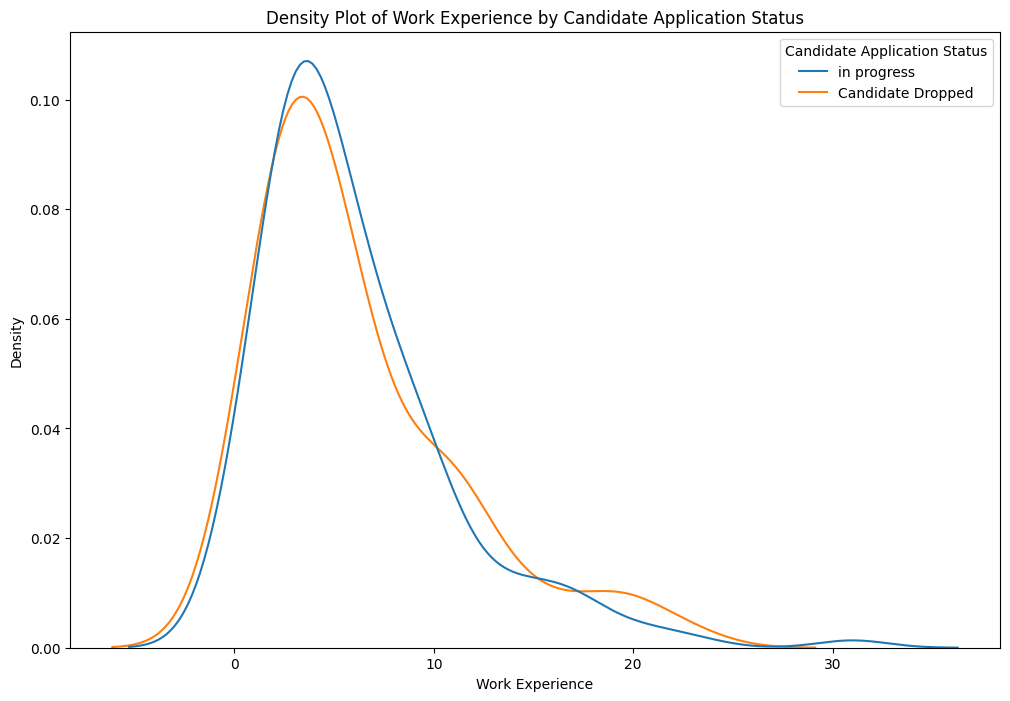

In [ ]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='Work Exp.', hue='Candidate Application Status', common_norm=False)
plt.title('Density Plot of Work Experience by Candidate Application Status')
plt.xlabel('Work Experience')
plt.ylabel('Density')
plt.show()
